## 6일차 서포트 벡터 머신
### 최적의 매개변수를 찾고 최종 서포트 벡터 머신 모델을 만들어라. 그리고 sklearn의 roc_curve 함수를 이용하여 roc curve를 그리고 결과를 해석하라.
### 데이터 : 유방암 데이터(변수: 31개, 자료 수: 569개)
###  -목표변수(diagnosis, 0: Malignant(악성,357개), 1: Benign(양성,212개) 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from sklearn.preprocessing import scale
matplotlib.rc('font',family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus']=False
import warnings
warnings.simplefilter(action="ignore", category=FutureWarning)
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
# ROC 곡선
from sklearn.metrics import roc_curve

In [2]:
bcancer = pd.read_csv("./과제파일/유방암.csv",engine = "python")
bcancer.isnull().sum() # 결측치 없음
bcancer.head()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
x = bcancer.drop("diagnosis", axis = 1, inplace = False)
y = bcancer["diagnosis"]
bcancer_train_x, bcancer_test_x, bcancer_train_y, bcancer_test_y = train_test_split(x, y, test_size=0.3, random_state=1234)
# train 데이터와 test 데이터 크기
print("train data X size : {}".format(bcancer_train_x.shape))
print("train data Y size : {}".format(bcancer_train_y.shape))
print("test data X size : {}".format(bcancer_test_x.shape))
print("test data Y size : {}".format(bcancer_test_y.shape))
# SVC 모델 생성: SVC
svm_uncustomized = SVC(random_state=1234)
svm_uncustomized.fit(bcancer_train_x, bcancer_train_y)
# 훈련 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(svm_uncustomized.score(bcancer_train_x, bcancer_train_y)))
# 테스트 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(svm_uncustomized.score(bcancer_test_x,bcancer_test_y)))

train data X size : (398, 30)
train data Y size : (398,)
test data X size : (171, 30)
test data Y size : (171,)
Accuracy on training set: 1.000
Accuracy on test set: 0.614


### test set의 Accuracy가 너무 낮아서 scale을 하고 분석을 진행해야겠다.

In [4]:
# train 데이터셋 스케일 조정
bcancer_train_x_scaled = scale(bcancer_train_x, axis=0)
# test 데이터셋 스케일 조정
bcancer_test_x_scaled = scale(bcancer_test_x, axis=0)

In [5]:
x = bcancer.drop("diagnosis", axis = 1, inplace = False)
y = bcancer["diagnosis"]
bcancer_train_x, bcancer_test_x, bcancer_train_y, bcancer_test_y = train_test_split(x, y, test_size=0.3, random_state=1234)
# train 데이터와 test 데이터 크기
print("train data X size : {}".format(bcancer_train_x.shape))
print("train data Y size : {}".format(bcancer_train_y.shape))
print("test data X size : {}".format(bcancer_test_x.shape))
print("test data Y size : {}".format(bcancer_test_y.shape))
# SVC 모델 생성: SVC
svm_uncustomized = SVC(random_state=1234)
svm_uncustomized.fit(bcancer_train_x_scaled, bcancer_train_y)
# 훈련 데이터 셋 정확도
print("Accuracy on training set: {:.3f}".format(svm_uncustomized.score(bcancer_train_x_scaled, bcancer_train_y)))
# 테스트 데이터 셋 정확도
print("Accuracy on test set: {:.3f}".format(svm_uncustomized.score(bcancer_test_x_scaled,bcancer_test_y)))

train data X size : (398, 30)
train data Y size : (398,)
test data X size : (171, 30)
test data Y size : (171,)
Accuracy on training set: 0.995
Accuracy on test set: 0.953


In [14]:
parameters = {'kernel':('linear', 'rbf'),
              'C':[C+1 for C in range(10)],
              'gamma':[gamma/10 for gamma in range(1,10)],
              }
svm = SVC(random_state=1234)
gsearch = GridSearchCV(svm, parameters,cv=5,n_jobs = -1)
gsearch.fit(bcancer_train_x_scaled, bcancer_train_y)
print("Best Score: {}".format(gsearch.best_score_))
print("Best params: {}".format(gsearch.best_params_))

Best Score: 0.9748743718592965
Best params: {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}


/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


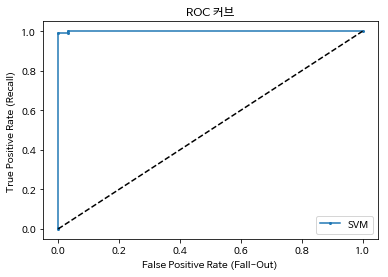

In [31]:
d = gsearch.best_params_
model = SVC(C = d['C'], gamma = d['gamma']).fit(bcancer_train_x_scaled, bcancer_train_y)
fpr, tpr, thresholds = roc_curve(bcancer_train_y, model.decision_function(bcancer_train_x_scaled))
plt.plot(fpr, tpr, 'o-', ms=2, label="SVM")
plt.legend()
plt.plot([0, 1], [0, 1], 'k--', label="random guess")
plt.xlabel('False Positive Rate (Fall-Out)')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC 커브')
plt.show()

In [7]:
# 트레인 및 테스트 정확도 결과 저장용
train_accuracy = []
test_accuracy = []
Para_C = []
# C를 0.1부터 1까지 0.1단위로 조정
for C in range(10):
    svm1 = SVC(C = C+1,random_state=1234)
    svm1.fit(bcancer_train_x_scaled, bcancer_train_y)
    Para_C.append(C+1)
    train_accuracy.append(svm1.score(bcancer_train_x_scaled, bcancer_train_y))
    test_accuracy.append(svm1.score(bcancer_test_x_scaled,bcancer_test_y))
# 생성된 모델의 정확도 테이블 생성
ds_accuracy1 = pd.DataFrame()
ds_accuracy1["C"] = Para_C
ds_accuracy1["TrainAccuracy"] = train_accuracy
ds_accuracy1["TestAccuracy"] = test_accuracy
# C별 정확도 테이블
ds_accuracy1.round(3)

,C,TrainAccuracy,TestAccuracy
0,1,0.995,0.953
1,2,0.997,0.953
2,3,0.997,0.953
3,4,0.997,0.953
4,5,0.997,0.953
5,6,0.997,0.953
6,7,0.997,0.953
7,8,0.997,0.959
8,9,0.997,0.953
9,10,0.997,0.947


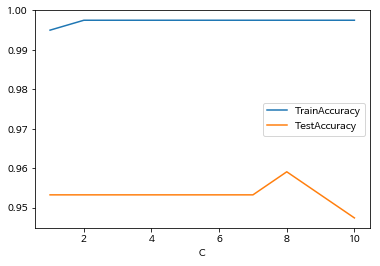

In [8]:
ds_accuracy1.set_index("C", inplace = False).plot.line()

In [9]:
# 트레인 및 테스트 정확도 결과 저장용
train_accuracy = []
test_accuracy = []
para_gamma = []
# Gamma를 0.1부터 1까지 0.1단위로 조정
for gamma in range(1,10):
    svm2 = SVC(gamma = gamma/10,random_state=1234)
    svm2.fit(bcancer_train_x_scaled, bcancer_train_y)
    para_gamma.append(gamma/10)
    train_accuracy.append(svm2.score(bcancer_train_x_scaled, bcancer_train_y))
    test_accuracy.append(svm2.score(bcancer_test_x_scaled,bcancer_test_y))
# 생성된 모델의 정확도 테이블 생성
ds_accuracy2 = pd.DataFrame()
ds_accuracy2["Gamma"] = para_gamma
ds_accuracy2["TrainAccuracy"] = train_accuracy
ds_accuracy2["TestAccuracy"] = test_accuracy
ds_accuracy2.round(3)

,Gamma,TrainAccuracy,TestAccuracy
0,0.1,0.997,0.918
1,0.2,0.997,0.912
2,0.3,0.997,0.912
3,0.4,0.997,0.877
4,0.5,1.000,0.784
5,0.6,1.000,0.690
6,0.7,1.000,0.649
7,0.8,1.000,0.626
8,0.9,1.000,0.620


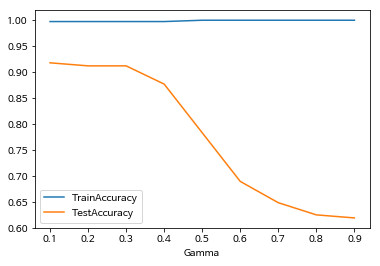

In [10]:
ds_accuracy2.set_index("Gamma", inplace = False).plot.line()

In [16]:
roc_curve

<function sklearn.metrics.ranking.roc_curve(y_true, y_score, pos_label=None, sample_weight=None, drop_intermediate=True)>

In [ ]:
fpr, tpr, threshold = roc_curve()